# Project Graphs and Matching
## Subject
You must:
1. Find a dataset... Then find a relevant question or hypothesis about the dataset that would require a clustering or a graph construction to answer
2. Generate a Graph describing compatibilities between datapoints
So maby we should:
    - quantify the non quantitatives variables
    - normalize and / or weight (or doing dimensionnality reduction)
    - remove useless
    - create a distance
    - set a treshold
    - build edges
3. Return a clustering on the given datapoints to answer the question / validate hypothesis


## The dataset
### The generation
The generation of the dataset has been done through the spotify python API, see the Dataset-generation.ipynb notebook in order to do the same

### Loading the dataset

In [3]:
import pandas as pd

In [4]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
df = pd.read_csv("./datasets/playlist-gabriel.csv")
df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,uri,track_href,analysis_url,duration_ms,time_signature,added_at,song_title,artists,genres,principal_genre
0,0,0.661,0.765,2,-8.818,1,0.0297,0.0757,0.8010,0.0919,...,spotify:track:38CngZw3TDi2XDCQPMKHJR,https://api.spotify.com/v1/tracks/38CngZw3TDi2...,https://api.spotify.com/v1/audio-analysis/38Cn...,228293,4,2020-04-07T16:07:14Z,A Sheltered Place - Phaeleh Remix,"Way Out West,Phaeleh","['classic progressive house', 'nu skool breaks...",house
1,1,0.728,0.784,8,-12.477,1,0.0414,0.1030,0.8480,0.0858,...,spotify:track:6YJ9z4IInxfJWsjc6ADtV2,https://api.spotify.com/v1/tracks/6YJ9z4IInxfJ...,https://api.spotify.com/v1/audio-analysis/6YJ9...,377919,3,2020-04-07T13:40:07Z,Prelusion,"Mark Tarmonea,Yannek Maunz",['german house'],house
2,2,0.725,0.742,0,-8.646,1,0.0328,0.0887,0.8100,0.1070,...,spotify:track:4isQapTCsf1TvF9RkzfrCG,https://api.spotify.com/v1/tracks/4isQapTCsf1T...,https://api.spotify.com/v1/audio-analysis/4isQ...,277073,4,2020-04-07T09:13:47Z,Odyssee - Pt. 2,BLR,"['dutch edm', 'house']",house
3,3,0.689,0.810,8,-6.621,0,0.0464,0.0203,0.9010,0.1390,...,spotify:track:0oB0mWnbRYNsC2CicOkXZL,https://api.spotify.com/v1/tracks/0oB0mWnbRYNs...,https://api.spotify.com/v1/audio-analysis/0oB0...,407803,4,2020-04-06T14:33:04Z,GUFM - Folamour Remix,"Mangabey,Folamour",[],other
4,4,0.946,0.493,8,-9.654,1,0.0509,0.1620,0.2970,0.0875,...,spotify:track:0aKoR2iMGuqAUBBCdRwII8,https://api.spotify.com/v1/tracks/0aKoR2iMGuqA...,https://api.spotify.com/v1/audio-analysis/0aKo...,270000,4,2020-04-04T12:08:27Z,Prettiest Virgin (Radio Edit),Agar Agar,"['electronica', 'french indie pop', 'french in...",pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,0.692,0.626,11,-11.361,0,0.0637,0.0432,0.7970,0.1100,...,spotify:track:4bkTaAK3tvBi7M9S6UEyy2,https://api.spotify.com/v1/tracks/4bkTaAK3tvBi...,https://api.spotify.com/v1/audio-analysis/4bkT...,353541,4,2016-12-28T16:20:11Z,StillDreaming,Hypnagog,"['ambient psychill', 'deep psytrance']",techno
362,2,0.489,0.571,10,-11.268,0,0.0933,0.1480,0.6660,0.1830,...,spotify:track:6H0HOzCvYYbzdhhrOVBzxb,https://api.spotify.com/v1/tracks/6H0HOzCvYYbz...,https://api.spotify.com/v1/audio-analysis/6H0H...,262139,1,2016-12-28T16:20:11Z,FunkDiddle,Hypnagog,"['ambient psychill', 'deep psytrance']",techno
363,3,0.700,0.581,6,-7.116,1,0.1500,0.3580,0.0539,0.0825,...,spotify:track:3ndu6BpfkiGE4m0BboNUHv,https://api.spotify.com/v1/tracks/3ndu6BpfkiGE...,https://api.spotify.com/v1/audio-analysis/3ndu...,277385,4,2016-12-28T14:29:04Z,Tempo,"Ondubground,Biga Ranx","['dub reggae', 'electro dub', 'french dub']",reggae
364,4,0.638,0.724,6,-7.291,1,0.0270,0.0206,0.5250,0.1390,...,spotify:track:5MFtsrwzB0SoZzp2QvaSmF,https://api.spotify.com/v1/tracks/5MFtsrwzB0So...,https://api.spotify.com/v1/audio-analysis/5MFt...,243016,4,2016-12-28T14:28:35Z,Because,Ondubground,"['dub reggae', 'electro dub', 'french dub']",reggae


In [5]:
# cheking the types
df.dtypes

Unnamed: 0            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
added_at             object
song_title           object
artists              object
genres               object
principal_genre      object
dtype: object

### Explanation of the fields
Nearly every fields explanations can be found at this address: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

### Data exploration
#### Imports
let's import some usefull libraries to dig in the data

In [6]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

#### Utils
Let's create some function to plot the data correctly


In [7]:
def my_radarplot(categories: list, values: list, max_value: float=1.0, number_of_ticks: int=4, ticksize: int=8) :
    if number_of_ticks <= 0:
        # avoiding is a division by zero
        return
    
    # number of variable
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values += values[:1]
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    for tick in range(number_of_ticks):
        ticknumbers = [x / number_of_ticks for x in range(1, number_of_ticks)]
        ticklabels = [f"{x:.2f}" for x in ticknumbers]
        
    plt.yticks(ticknumbers, ticklabels, color="grey", size=ticksize)
    plt.ylim(0, max_value)
 
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)



#### Determine a listener profile
Let's take the average of all the interresting features of my playlist and see if we can profile a "listening mood"

In [8]:
interestingColumns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']
df_my_profile_mean = df[interestingColumns].mean()

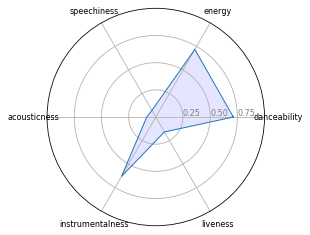

In [9]:
my_radarplot(df_my_profile_mean.keys(), df_my_profile_mean[:].tolist())

We can safely say that I do not listen to speech only podcast on spotify

#### How are distributed the music genres I listen to ?

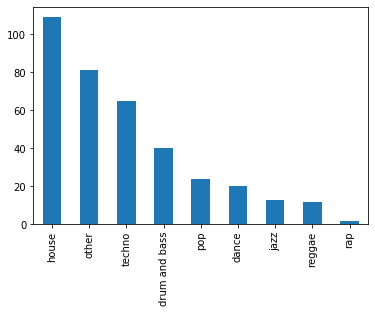

In [10]:
#df_principal_genres = df['principal_genre']
#df_principal_genres.value_counts().plot()

df_principal_genres = df['principal_genre']
df_principal_genres.value_counts().plot(kind="bar")



### What can we wonder ?
The question now could be: To what extent these features (liveness, speechiness, ...) may represent the genre ?

## Building a graph
### Build the nodes

util function to display the results of the graph creation functions

In [21]:
from itertools import islice

# this is to display only; source: https://stackoverflow.com/questions/7971618/python-return-first-n-keyvalue-pairs-from-dict
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

##### Quantify non quantitatives variables

eg: turning songs name as name of the nodes, and assigning them numbers to retrieve the songs names afterward

In [47]:
# The goal here is to assign a number to each song in order to build the graph.
graph_nodes_song_titles = {index:row['song_title'] for (index, row) in df.iterrows()}
graph_nodes_song_genres = {index:row['principal_genre'] for (index, row) in df.iterrows()}

# display 5 first to verify the shape and the content
for i in range(15):
    print(f"Node: {i} with genre: {graph_nodes_song_genres[i]} has the name: {graph_nodes_song_titles[i]}")

Node: 0 with genre: house has the name: A Sheltered Place - Phaeleh Remix
Node: 1 with genre: house has the name: Prelusion
Node: 2 with genre: house has the name: Odyssee - Pt. 2
Node: 3 with genre: other has the name: GUFM - Folamour Remix
Node: 4 with genre: pop has the name: Prettiest Virgin (Radio Edit)
Node: 5 with genre: house has the name: Chymera
Node: 6 with genre: house has the name: Fuse
Node: 7 with genre: house has the name: Let's Be Friends
Node: 8 with genre: other has the name: La Vie est Belle
Node: 9 with genre: pop has the name: L'amour le jour
Node: 10 with genre: other has the name: Sea, Sex And Sun
Node: 11 with genre: house has the name: Venasque
Node: 12 with genre: pop has the name: Maintenant ou jamais
Node: 13 with genre: pop has the name: Basta Così (feat. Alex Rossi)
Node: 14 with genre: pop has the name: Parfait Tirage


##### Setting the values of the nodes

Setting a value to each of the nodes designated by a number (index) as done in the previous cell

In [48]:
# Taking some interesting columns values as numpy arrays for each node
graph_nodes_values = {index:row[interestingColumns].values for (index, row) in df.iterrows()}

# display 5 first to verify the shape and the content
for i in range(15):
    print(f"Node: {i} with genre: {graph_nodes_song_genres[i]} has the name: {graph_nodes_song_titles[i]} with values: {graph_nodes_values[i]}")

Node: 0 with genre: house has the name: A Sheltered Place - Phaeleh Remix with values: [0.6609999999999999 0.765 0.0297 0.0757 0.8009999999999999 0.0919]
Node: 1 with genre: house has the name: Prelusion with values: [0.728 0.784 0.0414 0.10300000000000001 0.848 0.0858]
Node: 2 with genre: house has the name: Odyssee - Pt. 2 with values: [0.725 0.742 0.0328 0.0887 0.81 0.107]
Node: 3 with genre: other has the name: GUFM - Folamour Remix with values: [0.6890000000000001 0.81 0.0464 0.0203 0.9009999999999999 0.139]
Node: 4 with genre: pop has the name: Prettiest Virgin (Radio Edit) with values: [0.946 0.493 0.0509 0.162 0.297 0.0875]
Node: 5 with genre: house has the name: Chymera with values: [0.763 0.7809999999999999 0.0525 0.00117 0.8540000000000001 0.159]
Node: 6 with genre: house has the name: Fuse with values: [0.845 0.451 0.0741 0.0228 0.888 0.111]
Node: 7 with genre: house has the name: Let's Be Friends with values: [0.765 0.647 0.0581 0.000254 0.897 0.0516]
Node: 8 with genre: o

### create a distance


In [51]:
import numpy as np

# a and b are both numpy arrays
def distance_euclidian(a, b):
    # addition of the squares of the substraction of each element of b and a
    return np.sum((b - a) ** 2)
    
# let's test this distance over two arbitrarily chosen nodes
a = 1
b = 2

print(f"a node song: {graph_nodes_song_titles[a]}\twith genre: {graph_nodes_song_genres[a]}\t| values: {graph_nodes_values[a]}")
print(f"b node song: {graph_nodes_song_titles[b]}\twith genre: {graph_nodes_song_genres[b]}\t| values: {graph_nodes_values[b]}")
print(f"with euclidian distance: {distance_euclidian(graph_nodes_values[a], graph_nodes_values[b])}")
print()

a = 0
b = 9
print(f"a node song: {graph_nodes_song_titles[a]}\twith genre: {graph_nodes_song_genres[a]}\t| values: {graph_nodes_values[a]}")
print(f"b node song: {graph_nodes_song_titles[b]}\twith genre: {graph_nodes_song_genres[b]}\t| values: {graph_nodes_values[b]}")
print(f"with euclidian distance: {distance_euclidian(graph_nodes_values[a], graph_nodes_values[b])}")
print()

a node song: Prelusion	with genre: house	| values: [0.728 0.784 0.0414 0.10300000000000001 0.848 0.0858]
b node song: Odyssee - Pt. 2	with genre: house	| values: [0.725 0.742 0.0328 0.0887 0.81 0.107]
with euclidian distance: 0.003944889999999997

a node song: A Sheltered Place - Phaeleh Remix	with genre: house	| values: [0.6609999999999999 0.765 0.0297 0.0757 0.8009999999999999 0.0919]
b node song: L'amour le jour	with genre: pop	| values: [0.623 0.789 0.0309 0.00461 0.0756 0.163]
with euclidian distance: 0.5383355980999999



We can see that the distance between two tracks of the same music genre is way smaller than the distance between two completely different tracks

So this behaves as expected so far

### set a treshold


In [53]:
node_building_threshold = 0.5

### build edges

In [55]:
graph_nodes_edges = dict()
for (index, row) in df.iterrows():
    edges = []
    for (indexPrime, rowPrime) in df.iterrows():
        if indexPrime == index:
            continue
        distance_tmp = distance_euclidian(graph_nodes_values[index], graph_nodes_values[indexPrime])
        if distance_tmp > node_building_threshold:
            continue
        edges.append((indexPrime, distance_tmp))
    graph_nodes_edges[index] = edges

for i in range(5):
    print(graph_nodes_edges[i])

[(1, 0.007978390000000012), (2, 0.00511262000000001), (3, 0.018375460000000007), (4, 0.4171414900000001), (5, 0.024045970900000036), (6, 0.14515558000000003), (7, 0.04207874891600004), (13, 0.15976329999999997), (14, 0.42615926), (15, 0.3163699899999999), (16, 0.024934819999999986), (17, 0.41408885999999984), (20, 0.026990741056000033), (21, 0.06233378000000004), (22, 0.09976667032399998), (23, 0.09259552999999998), (24, 0.05421389000000003), (25, 0.12307786000000005), (26, 0.16769909999999993), (27, 0.07932175690000001), (30, 0.0277694281), (31, 0.02671081999999997), (35, 0.04684283410000001), (39, 0.20581889999999997), (40, 0.04132055000000004), (41, 0.09921273771456007), (42, 0.07453909960000005), (43, 0.023728660000000002), (44, 0.06693226920100002), (45, 0.20118415000000006), (46, 0.016070300000000003), (47, 0.16159978000000003), (49, 0.01300891), (51, 0.1749013), (53, 0.17545919000000004), (54, 0.10243350000000002), (56, 0.3546331400000001), (58, 0.10477126000000003), (59, 0.2137